<a href="https://colab.research.google.com/github/sokrypton/GREMLIN_CNN/blob/master/GREMLIN_CNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pylab as plt

In [0]:
%%bash
wget -nc -q https://raw.githubusercontent.com/sokrypton/GREMLIN_CNN/master/gremlin.py
wget -nc -q https://raw.githubusercontent.com/sokrypton/GREMLIN_CNN/master/cnn.py
wget -nc -q https://raw.githubusercontent.com/sokrypton/GREMLIN_CNN/master/model_D_16Nov2018_n1.weights
wget -nc -q https://gremlin2.bakerlab.org/db/ECOLI/fasta/P05100.fas

In [0]:
# patience...
import gremlin

In [0]:
# ==========================================================================
# PREP MSA
# ==========================================================================
# parse fasta
headers, seqs = gremlin.parse_fasta("P05100.fas")

# process input training sequences
msa = gremlin.mk_msa(seqs)

In [5]:
# RUN GREMLIN
mrf = gremlin.GREMLIN(msa)

iter 30 255781.03
iter 40 247224.75
iter 50 243745.21
iter 60 242257.67
iter 70 241595.18
iter 80 241290.59
iter 90 241134.01
iter 100 241043.75


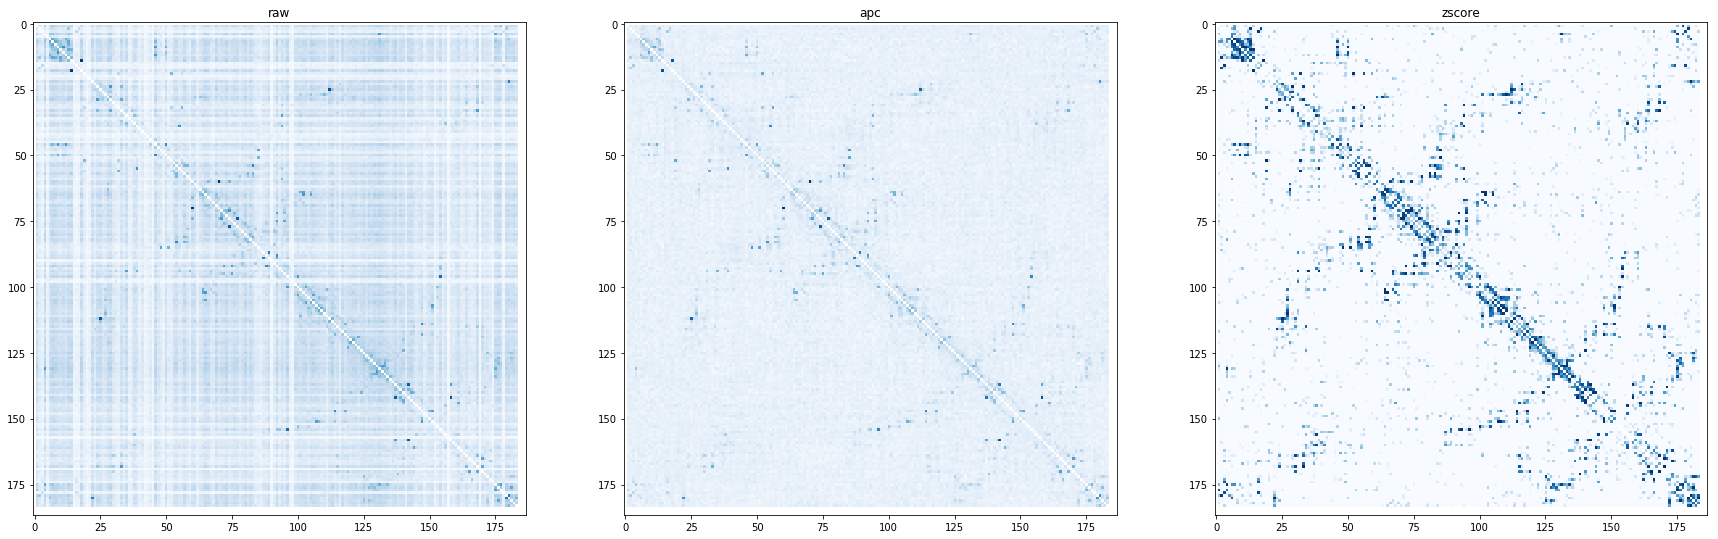

In [6]:
# GET MATRIX
mtx = gremlin.get_mtx(mrf)  
gremlin.plot_mtx(mtx)

In [0]:
import cnn

In [0]:
def CNN(msa,mtx):
  arr = mtx["apc"]
  arr_idx = (mtx["i"],mtx["j"])
  neff = msa["neff"]
  
  ref_seq = "".join([gremlin.alphabet[a] for a in msa["msa_ori"][0]])  
  seq = np.expand_dims(cnn.aa2num(ref_seq),-1)
  ref = msa["v_idx"]

  preds_mtx = np.zeros((len(ref_seq),len(ref_seq)))
  preds_mtx[arr_idx] = cnn.normalize(arr)
  preds_mtx += preds_mtx.T
  
  data = cnn.get_data(seq,arr,ref,arr_idx,neff)
  cnn_preds = cnn.model.predict_generator(data,steps=1)
  cnn_preds_mtx = np.squeeze(cnn_preds,(0,-1))

  return preds_mtx, cnn_preds_mtx, ref_seq, neff

In [0]:
preds_mtx, cnn_preds_mtx, sequence, neff = CNN(msa,mtx)

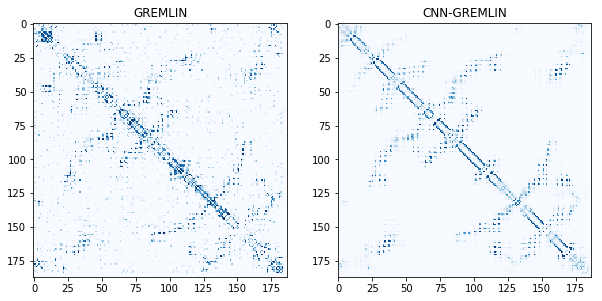

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(preds_mtx, cmap='Blues', interpolation='none', vmin=1, vmax=3)
plt.grid(False)
plt.title("GREMLIN")

plt.subplot(1, 2, 2)
plt.imshow(cnn_preds_mtx, cmap='Blues', interpolation='none', vmin=0, vmax=1)
plt.grid(False)
plt.title("CNN-GREMLIN")
plt.show()